In [1]:
# Importing Packages
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import pickle

In [2]:
#Dataset
data=pd.read_csv("https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle.csv")

In [3]:
data.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN


In [4]:
data.shape

(2086, 9)

In [5]:
#Selecting first 5 columns and dropping the rest
data = data.drop(data.columns[5:], axis=1)

#Renaming the columns
data.columns=['Category','Accident_type','Year','Month','Value']
data

,Category,Accident_type,Year,Month,Value
0,Alkoholunfälle,insgesamt,2022,202201,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       2086 non-null   object 
 1   Accident_type  2086 non-null   object 
 2   Year           2086 non-null   int64  
 3   Month          2086 non-null   object 
 4   Value          2002 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.6+ KB


In [7]:
#Dropping the records which come after 2020
data=data[data['Year']<=2020]
data

,Category,Accident_type,Year,Month,Value
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
...,...,...,...,...,...
2081,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2082,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2083,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2084,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [8]:
#Checking for null values
data.isnull().sum()

Category         0
Accident_type    0
Year             0
Month            0
Value            0
dtype: int64

In [9]:
# creating a dataframe containing all observations without the sum
data = data[data['Month'] != 'Summe']


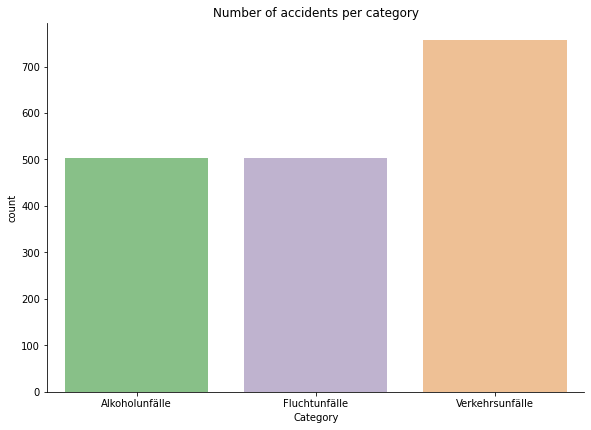

In [10]:
# Plot Number of accidents per category
plot = sns.catplot(x="Category", kind="count", data=data, palette="Accent")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(9,6)


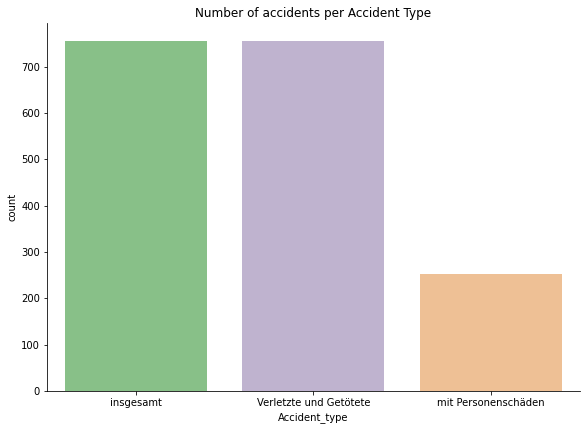

In [11]:
# Plot Number of accidents per Accident Type
plot = sns.catplot(x="Accident_type", kind="count", data=data, palette="Accent")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(9,6)

In [12]:
# Get only month numbers in Month column
data['Month'] = data['Month'].str[-2:]
data['Month'] = data['Month'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 26 to 2085
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       1764 non-null   object 
 1   Accident_type  1764 non-null   object 
 2   Year           1764 non-null   int64  
 3   Month          1764 non-null   int64  
 4   Value          1764 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 147.2+ KB


In [14]:
data.describe()

,Year,Month,Value
count,1764.000000,1764.000000,1764.000000
mean,2010.000000,6.500000,780.292517
std,6.057018,3.453031,1180.838117
min,2000.000000,1.000000,0.000000
25%,2005.000000,3.750000,38.750000
50%,2010.000000,6.500000,360.000000
75%,2015.000000,9.250000,813.250000
max,2020.000000,12.000000,4763.000000


In [15]:
"""#Converting categorical variables into numberic values
from sklearn.preprocessing import LabelEncoder  

le = LabelEncoder()
data['Accident_type']=le.fit_transform(data['Accident_type'])
data['Category']=le.fit_transform(data['Category'])"""

"#Converting categorical variables into numberic values\nfrom sklearn.preprocessing import LabelEncoder  \n\nle = LabelEncoder()\ndata['Accident_type']=le.fit_transform(data['Accident_type'])\ndata['Category']=le.fit_transform(data['Category'])"

In [16]:
#Specifying the features
features = ['Year','Month']
X = data[features]
# Specify the prediction value
Y = data.Value.reset_index(drop = True)


In [17]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [18]:
#Linear regression Model
LR = LinearRegression()

#Training the model
LR.fit(X_train,Y_train)

LinearRegression()

In [19]:
#Checking for the last row,Actual value is 615.0
last_row=np.array([[2000,12]])
LR.predict(last_row)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([809.95132745])

The actual value is 615 and predicted value is 809

In [20]:
# Saving the model
pickle.dump(LR, open('model.pkl','wb'))